In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

# Project Overview

As a Data Scientist you are given a dataset of Air BNBs in New York city and you need to identify if the price of a property rises or declines with the respect to the number of reviews shared about the property. Furthermore, you should identify if the postings for different types of rooms varying with size and description also have an effect on pricing or not

In [2]:
df=pd.read_csv('AB_NYC_2019.csv')

# Data Exploration

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.shape

(48895, 16)

# Data Cleaning

In [7]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Since every host has their unique id, we do not need to use their names for prediction.

In [8]:
df.drop(['name','host_name'],axis=1,inplace=True)

Since no property can be as less as than 10 per night, and least price of property in New York is around 45 dollars, therefore, we can delete any properties which has per night price below 45 with zero reviews. Moreover, people are less likely to pay for any property whose price is more than 100 which has no reviews.

We can assume that people do not stay at a place which has minimum number of nights more than an 30 with no reviews and nobody books a place with minimum number of nights greater than 60 as it may require big deposit amount.

In [9]:
#Deleting properties with price less than 45 and total number of reviews as 0
df.drop(df[(df['price']<45)&(df['number_of_reviews']==0)].index,inplace=True)

#Deleting properties with price greater than 100 and total number of reviews as 0
df.drop(df[(df['price']>100)&(df['number_of_reviews']==0)].index,inplace=True)

#Deleting properties with minimum nights required for stay greater than 60
df.drop(df[df['minimum_nights']>60].index,inplace=True)

#Deleting properties with minimum nights required for stay greater than 60 and total number of reviews as 0
df.drop(df[(df['minimum_nights']>30)&(df['number_of_reviews']==0)].index,inplace=True)

Price of a legitimate property cannot be zero. Therefore assuming those listings as fake, those values shall be deleted

In [10]:
df.drop(df[df['price']==0].index,inplace=True)

# Data Visualization

Text(0, 0.5, 'count')

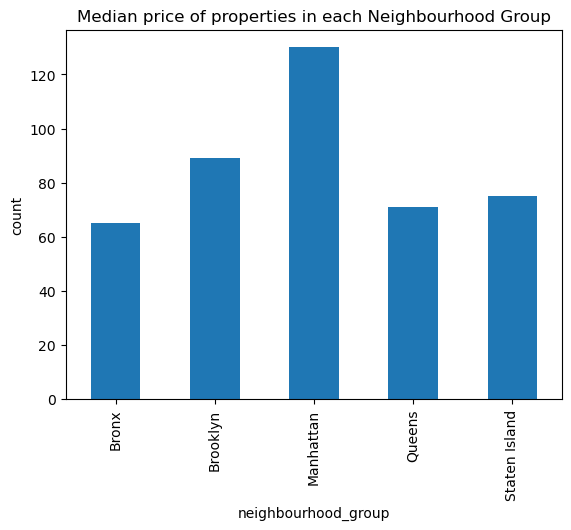

In [65]:
df.groupby('neighbourhood_group')['price'].median().plot(kind='bar')
plt.title('Median price of properties in each Neighbourhood Group')
plt.ylabel('count')

Targeting the median values to understand the expense of staying in each neighbourhood since there could be properties with extremely high prices which would give a biased result while calculating mean values, which is highest for Manhattan

Text(0, 0.5, 'Count')

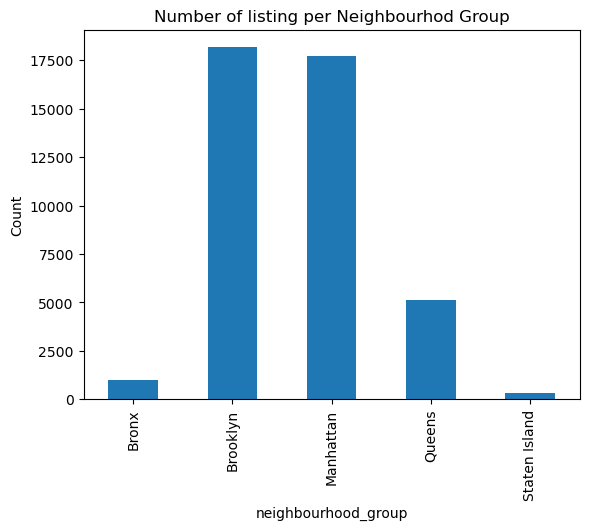

In [12]:
df.groupby('neighbourhood_group')['host_id'].count().plot(kind='bar')
plt.title('Number of listing per Neighbourhod Group')
plt.ylabel('Count')

Most number of registered AirBNBs are in Brooklyn and Manhattan, therefore explaining the high living expense in these two neighbourhood cities since the demand is more.

Text(0.5, 1.0, 'Distribution of Air BNB among different neighbourhood in Manhattan')

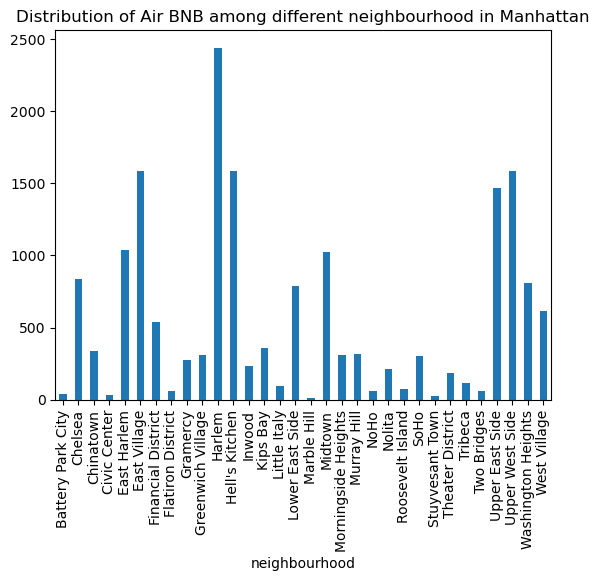

In [66]:
Manhattan= df[df['neighbourhood_group']=='Manhattan']
listing= Manhattan.groupby('neighbourhood')['host_id'].count()
listing.plot(kind='bar')
plt.title('Distribution of Air BNB among different neighbourhood in Manhattan')

Text(0.5, 1.0, 'Price of an Air BNB based on number of properties owned by a host')

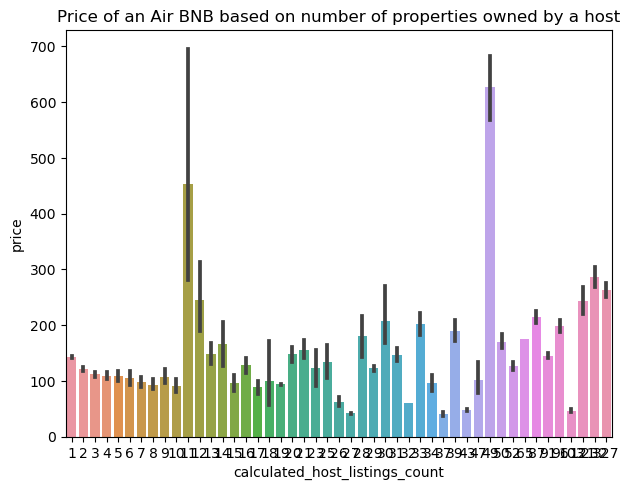

In [67]:
sns.barplot(y='price',x='calculated_host_listings_count',data=df)
plt.tight_layout()
plt.title('Price of an Air BNB based on number of properties owned by a host')

Text(0, 0.5, 'Number of properties')

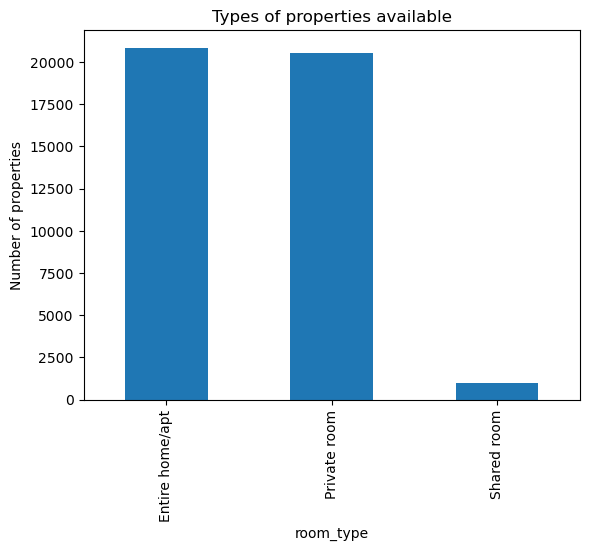

In [15]:
df.groupby('room_type')['host_id'].count().plot(kind='bar')
plt.title('Types of properties available')
plt.ylabel('Number of properties')

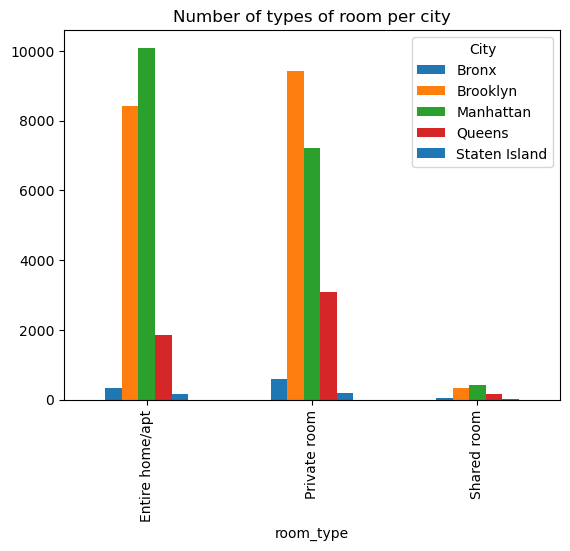

In [16]:
room_city= df.groupby(['room_type','neighbourhood_group'])['neighbourhood_group'].count().unstack()
room_city.plot(kind='bar',color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Number of types of room per city')
plt.legend(title='City')
plt.figsize=(10,8)


<AxesSubplot:xlabel='minimum_nights', ylabel='price'>

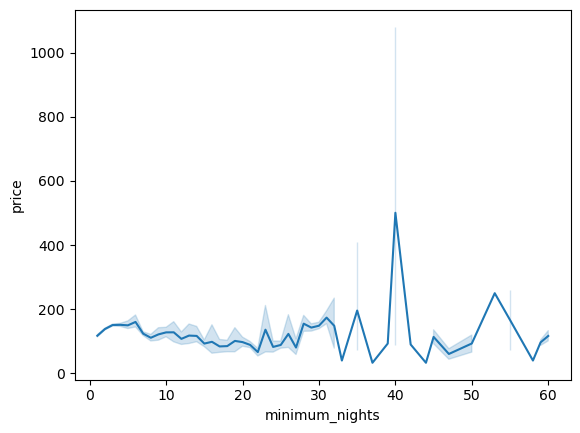

In [17]:
sns.lineplot(data=df,x='minimum_nights',y='price')

# Identifying Outliers

<AxesSubplot:xlabel='price', ylabel='Count'>

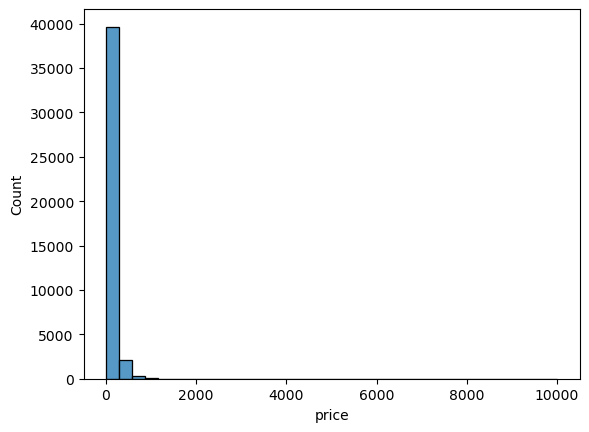

In [18]:
sns.histplot(df.price,bins=35)

In [19]:
def detect_outliers(data, threshold=1.5):
    quartile_1 = np.percentile(data.price, 25)
    quartile_3 = np.percentile(data.price, 75)
    iqr = quartile_3 - quartile_1
    lower = quartile_1 - threshold * iqr
    upper = quartile_3 + threshold * iqr
    outliers = np.where((data.price < lower) | (data.price > upper))
    rows=data.index[outliers]
    return rows




In [20]:
outliers = detect_outliers(df)
print("Outlier indices:", outliers)


Outlier indices: Int64Index([   85,   103,   114,   116,   121,   158,   181,   223,   233,
              242,
            ...
            47673, 47711, 47718, 47731, 47736, 47774, 47927, 47950, 48118,
            48740],
           dtype='int64', length=2169)


In [21]:
#Deleting Outliers
df.drop(index=outliers[0],inplace=True)

Text(0.5, 1.0, 'Distribution of Air BNB price')

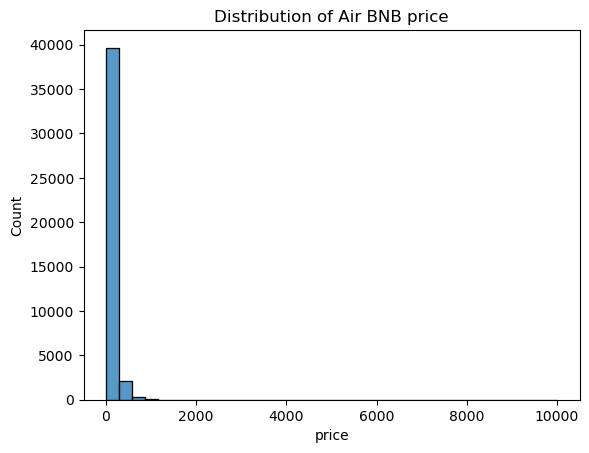

In [22]:
sns.histplot(data=df,x='price',bins=35)
plt.title('Distribution of Air BNB price')

In order to perform hypothesis testing, data should be normally distributed.


Text(0.5, 1.0, 'Distribution of Air BNB price after log transformation')

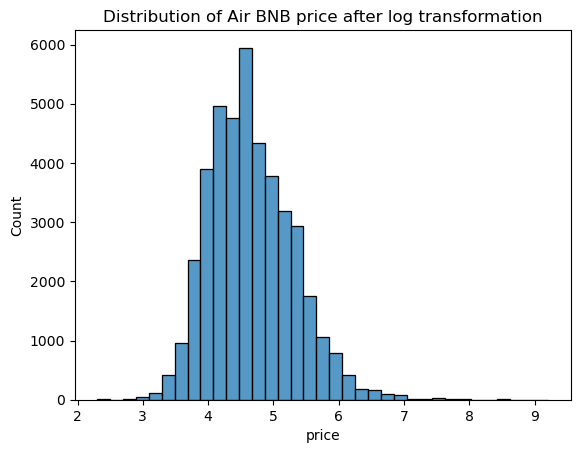

In [69]:
log=np.log(df['price'])
sns.histplot(log,bins=35)
plt.title('Distribution of Air BNB price after log transformation')

<AxesSubplot:xlabel='number_of_reviews', ylabel='Count'>

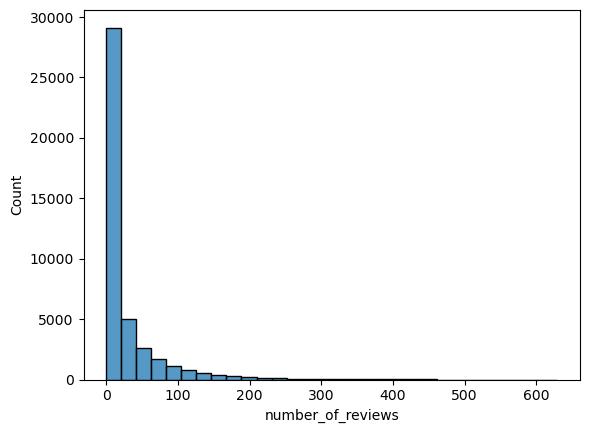

In [25]:
sns.histplot(df['number_of_reviews'],bins=30)

Since we cannot delete the entries with zero reviews as they may provide information to the model to predict the price of the property based on number of reviews we perform boxcox transformation

In [70]:
from scipy import stats
from scipy.stats import skew


# Example data including zeros
data =df['number_of_reviews']

# Adding a constant to make the data positive
constant = 1e-6
transformed_data, lambda_ = stats.boxcox(data + constant )

print("Transformed Data:", transformed_data)
print("Lambda parameter:", lambda_)


Transformed Data: [ 2.76737313  5.73629409 10.40526809 ... -4.63727674 -4.63727674
 -4.63727674]
Lambda parameter: 0.20249941261209933


skewness= -0.25383974654799035


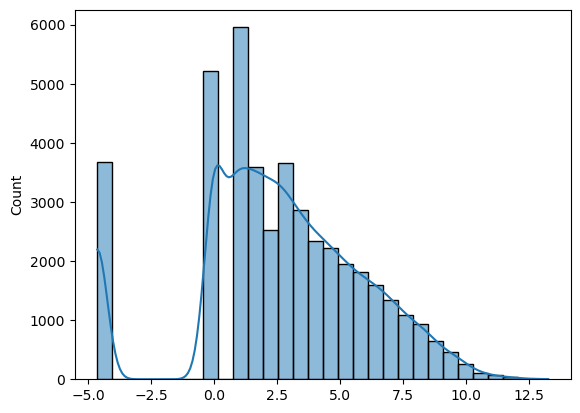

In [62]:
sns.histplot(transformed_data,bins=30,kde=True)
print('skewness=', skew(transformed_data))

# Hypothesis Testing

Hypothesis 1: What is the impact of number of reviews on the price of the property (Regression Analysis)

H_0: Number of reviews and price of the property are not coorelated

H_1: Number of reviews and price of the property are coorelated

In [29]:
# X is the input variables (independent variable)
X = transformed_data

# y is the target/dependent variable
y = df.price

X= sm.add_constant(X)

model= sm.OLS(y,X).fit()
predictions= model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     81.92
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           1.48e-19
Time:                        15:13:36   Log-Likelihood:            -2.7918e+05
No. Observations:               42341   AIC:                         5.584e+05
Df Residuals:                   42339   BIC:                         5.584e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        129.7720      1.092    118.805      0.000     127.631     131.913
x1             2.3149      0.256      9.051      0.000       1.814       2.816
==============================================================================
Omnibus:                    96999.925   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1425090166.033
Skew:                          21.972   Prob(JB):                         0.00
Kurtosis:                     900.690   Cond. No.                         5.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since p value is less than 0.05 we reject the null hypothesis meaning that the number of reviews and price of the property are correlated.

Hypothesis 2: What is the impact of property size and number of people sharing the property. (ANOVA)

H_0: There is so significant difference between prices of diffrent types of rooms and properties.

H_1: There is a significant difference in prices of different rooms.

19.433903583362856

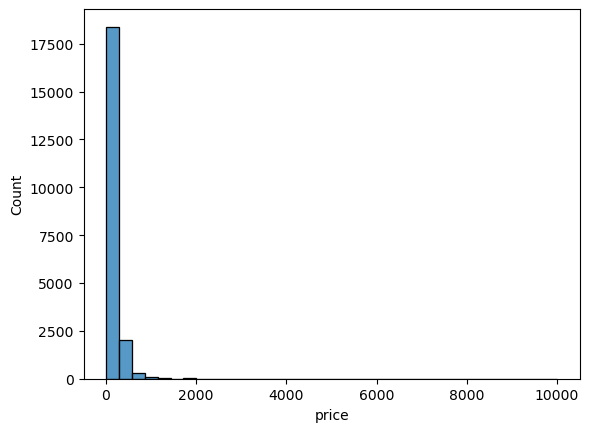

In [59]:
#sns.histplot(data=df,x='room_type',y='price')
home= df[df['room_type']=='Entire home/apt']['price']
sns.histplot(home,bins=35)
home.skew()


0.8225524503289621

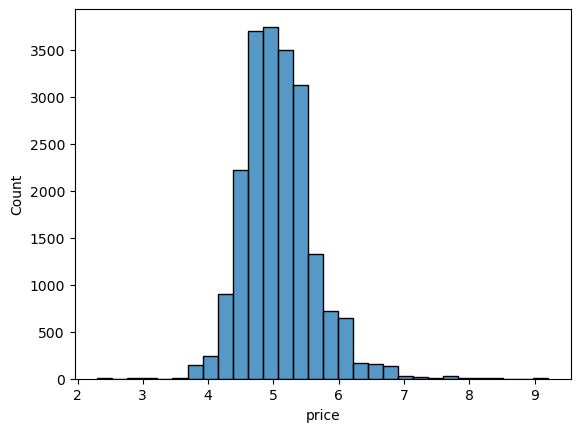

In [51]:
home_log= np.log(home)
sns.histplot(home_log,bins=30)
home_log.skew()

40.65369981611609

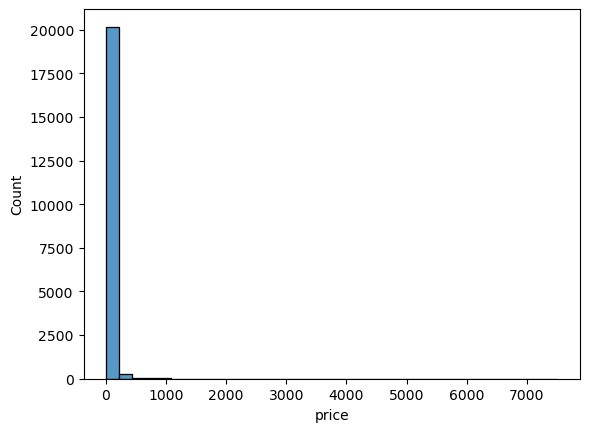

In [48]:
Private= df[df['room_type']=='Private room']['price']
sns.histplot(Private,bins=35)
Private.skew()


1.1194005016801325

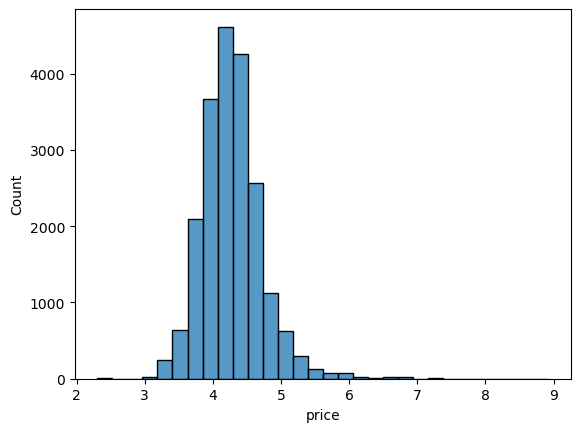

In [52]:
Private_log= np.log(Private)
sns.histplot(Private_log,bins=30)
Private_log.skew()

12.14992719393626

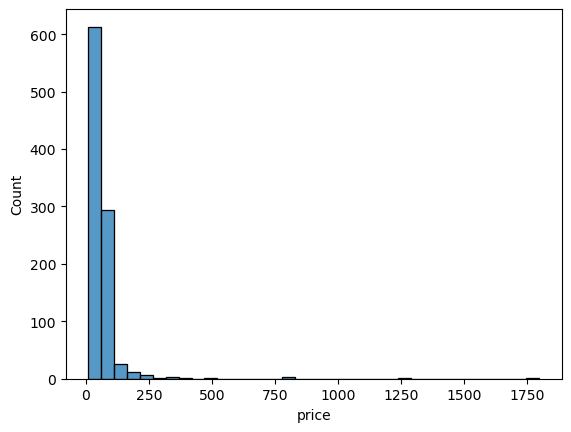

In [49]:
Shared= df[df['room_type']=='Shared room']['price']
sns.histplot(Shared,bins=35)
Shared.skew()

1.171010598741028

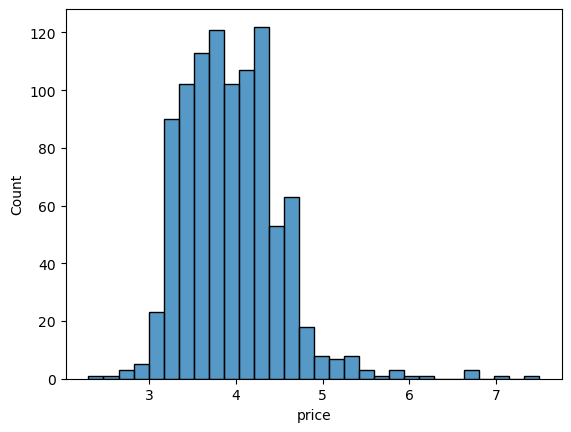

In [53]:
Shared_log= np.log(Shared)
sns.histplot(Shared_log,bins=30)
Shared_log.skew()

# Levene's Test

State the Hypothesis:

H_0: Equality of variance

H_1: Atleast one variance is not equal

In [57]:
#Testing for equality of Variance
import scipy
scipy.stats.levene(Shared_log,home_log,Private_log,center='mean')

LeveneResult(statistic=279.80255147308105, pvalue=1.902681257568522e-121)

Since p-value is greater than 0.05, we fail to reject the null hypothesis meaning, variance in the samples are equal

In [58]:
#Performing One way ANOVA
f_statistic, p_value= scipy.stats.f_oneway(Shared_log,Private_log,home_log)
print('f-statistic = ', f_statistic, "\t  p-value = ", p_value )

f-statistic =  14884.23812811713 	  p-value =  0.0


Since p value is less than 0.05 we reject the null hypothesis; suggesting that there is significant difference in price of different types of rooms

# Feature Selection

Here we will select the attributes which best describe the factors that affect the price of a property. These features can further be used to predict the price of a property for given factors using only the factors that impact the price significantly.

Heatmaps can be used to understand the more about the correlation bewteen attributes

<AxesSubplot:>

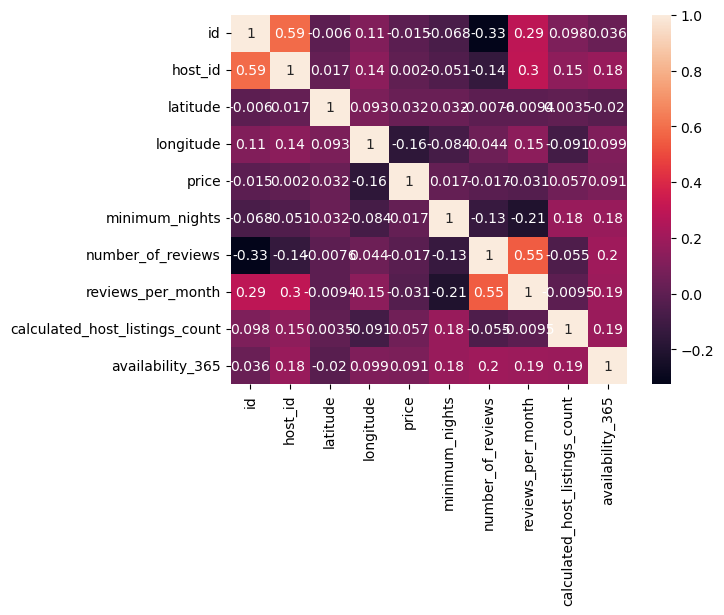

In [61]:
sns.heatmap(df.corr(),annot=True)

Since heatmap shows correlation between attributes with continuous distribution, we can use One Hot Encoding to trnasform required categorical data into numerical values to perform coorelation operation.

# Conclusion

1. The target variable, 'price' was positively skewed, so we performed log transformation to transform it to normal distribution.


2. We identified outliers and removed them from the dataset.


3. Price of a property varies in different neighbourhood group with Manhattan being most expensive.


4. Number of reviews given to a property online affects the price of the property suggesting that new renters finalise their rentals based on reviews from previous customer therefore increasing or decreasing the demand which alters the price of the property.  


5. Moreover, we noticed that type of property chosen to rent also affects the price of the property.